In [22]:
# 3 DOF Rocket Flight Simulation using RocketPy
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from rocketpy.rocket.rocket import BaseRocket
from rocketpy.rocket.rocket import PointMassRocket
from rocketpy.motors.PointMassMotor import PointMassMotor
from rocketpy import Flight, Environment, Function



Gravity Details

Acceleration of gravity at surface level:    9.8100 m/s²
Acceleration of gravity at   1.000 km (ASL): 9.8100 m/s²


Launch Site Details

Launch Date: 2020-02-22 13:00:00 UTC
Launch Site Latitude: 47.21348°
Launch Site Longitude: 9.00334°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 500252.61 E    5228887.37 N
Launch Site UTM zone: 32T
Launch Site Surface Elevation: 407.0 m


Atmospheric Model Details

Atmospheric Model Type: Reanalysis
Reanalysis Maximum Height: 1.000 km
Reanalysis Time Period: from 2020-02-22 00:00:00 to 2020-02-22 18:00:00 utc
Reanalysis Hour Interval: 4 hrs
Reanalysis Latitude Range: From 48.0° to 46.0°
Reanalysis Longitude Range: From 8.0° to 10.0°

Surface Atmospheric Conditions

Surface Wind Speed: 1.26 m/s
Surface Wind Direction: 213.21°
Surface Wind Heading: 33.21°
Surface Pressure: 980.43 hPa
Surface Temperature: 286.63 K
Surface Air Density: 1.192 kg/m³
Surface Speed of Sound: 339.39 m/s


Earth Model Details

Earth Radius at Lau

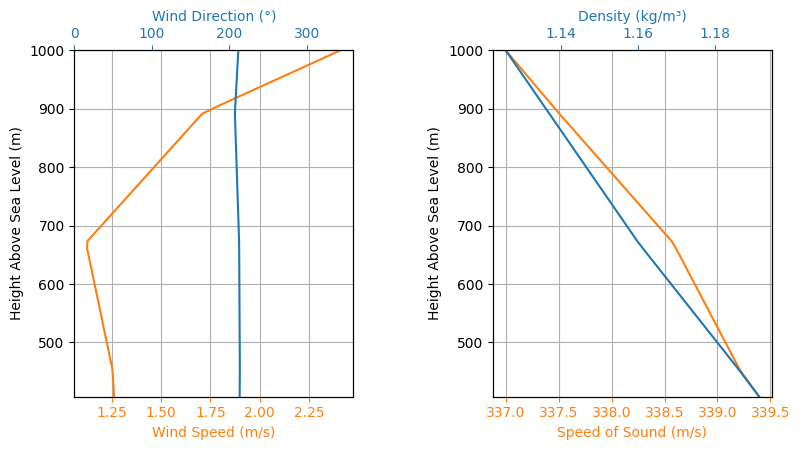

In [23]:
# Define Environment
# Environment conditions
env = Environment(
    gravity=9.81,
    latitude=47.213476,
    longitude=9.003336,
    date=(2020, 2, 22, 13),
    elevation=407,
)

env.set_atmospheric_model(
    type="Reanalysis",
    file="../../data/weather/bella_lui_weather_data_ERA5.nc",
    dictionary="ECMWF",
)
env.max_expected_height = 1000
env.info()

In [24]:
# Define Motor
# Thrust profile: constant for 3 seconds
def thrust_profile(t):
    return 250 if 0 <= t <= 3 else 0

motor = PointMassMotor(
    thrust_source=thrust_profile,
    dry_mass=1.0,
    thrust_curve=thrust_profile,
    propellant_initial_mass=0.5,
    propellant_final_mass=0.0,
    burn_time=3.0
)

In [25]:
# Define Rocket
rocket = PointMassRocket(mass=2.0, drag_coefficient=0.75)
rocket.add_motor(motor)

In [27]:
def wrap_env_check(env):
    original_get_value_opt = env.wind_velocity_y.get_value_opt
    def safe_get_value_opt(*args, **kwargs):
        print("✅ get_value_opt called with", args, kwargs)
        return original_get_value_opt(*args, **kwargs)
    env.wind_velocity_y.get_value_opt = safe_get_value_opt
    return env

env = wrap_env_check(env)

In [28]:
# Simulate Flight (3 DOF)
flight = Flight(
    rocket=rocket,
    environment=env,
    rail_length=5.0,
    inclination=85,  # degrees from horizontal
    heading=90,      # east
    simulation_mode="3 DOF",
    terminate_on_apogee=True,
    max_time=20,
    name="Test3DOF"
)

AttributeError: 'tuple' object has no attribute 'get_value_opt'

In [ ]:
# Plot Altitude
times = np.linspace(0, flight.apogee_time, 300)
altitudes = [flight.z(t) for t in times]

plt.plot(times, altitudes)
plt.xlabel("Time (s)")
plt.ylabel("Altitude (m)")
plt.title("3 DOF Rocket Altitude vs Time")
plt.grid(True)
plt.show()


AttributeError: 'tuple' object has no attribute 'get_value_opt'